In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [2]:
ab = pd.read_csv('../data/medium/dC_01.csv', header=None).values[0]
bestKnow = pd.read_csv('../data/medium/Best_Know1Fxs.csv', header=None).values[0]
bestKnow = bestKnow[:100].astype(float)
java_results = pd.read_csv('../data/medium/Feasibility1Fs.csv', header=None).values[0]
java_results = java_results[:-1].astype(float)
java_results_all = pd.read_csv('../data/medium/Feasibility1Fs.csv', header=None).iloc[:,:-1]

In [8]:
D = 30
frequency = 1_000
max_times = len(ab)
total_generations = max_times * frequency + 1000

def fitness_func(indiv): return (indiv.data**2).sum()
def constraint_func(indiv, b): return -b + sum((1/np.sqrt(D))*indiv.data)

population = Population.new_random(dimension=D)
opt = Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                   max_times=max_times, frequency=frequency, callbacks=[DynamicConstraint,OnChangeRestartPopulation])
opt.state_dict

{'gen': 0, 'evals': 0, 'time': 0, 'best': None}

In [5]:
df = pd.DataFrame({'java':java_results, 'bestKnow':bestKnow[:-1], 'results': opt.recorder.best_times_fitness[:-1]})

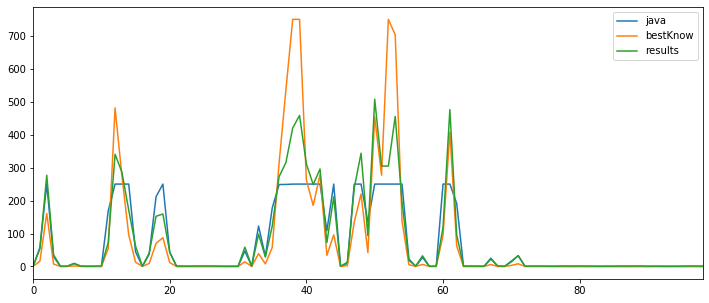

In [6]:
df.plot(figsize=(12,5))

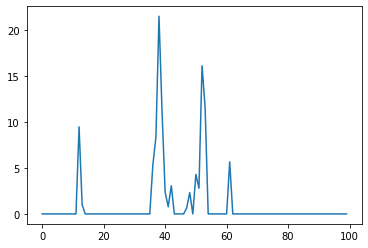

In [7]:
plt.plot([e.constraints_sum for e in opt.recorder.best_times])

# Multiple runs

In [9]:
runs = (Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                     max_times=max_times, frequency=frequency, callbacks=[DynamicConstraint,OnChangeRestartPopulation])
        .create_multiple_runs(n_runs=10))

In [10]:
runs.run(total_generations)

Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.


In [11]:
runs.times_data

,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,run_10
0,173.554207,101.525212,183.101376,173.965684,169.395942,177.362922,182.576235,143.536719,153.175406,214.030588
1,217.706910,332.270825,244.106819,211.577401,312.019366,270.997193,207.811308,264.761933,285.379062,270.654425
2,418.897010,382.228729,399.412886,397.996956,422.446194,387.931935,381.058041,345.051206,436.655403,354.786369
3,279.100988,228.864023,319.143494,250.084962,241.990372,228.142398,206.183542,217.295413,288.200510,303.332496
4,171.370051,161.673986,229.855778,192.097962,143.584752,168.328607,192.069238,116.444802,157.253282,205.680864
5,209.507655,177.774265,180.265172,148.538224,148.383938,157.863139,257.942784,145.269148,216.907281,159.593236
6,136.422941,240.373420,161.555289,135.277902,260.545184,203.593067,227.702971,163.293136,175.068651,224.847868
7,153.202655,150.007922,199.357905,108.983631,223.282581,167.895167,199.963192,197.698852,199.776303,208.841702
8,122.906426,178.382119,175.234631,206.811039,187.996146,105.502637,182.781649,228.582268,193.186032,59.605464
9,148.865009,152.125682,144.453145,166.240698,159.683355,123.020396,109.569071,103.434281,147.693718,127.013490


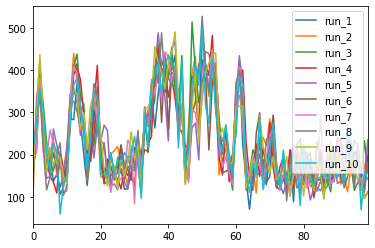

In [12]:
runs.times_data.plot();

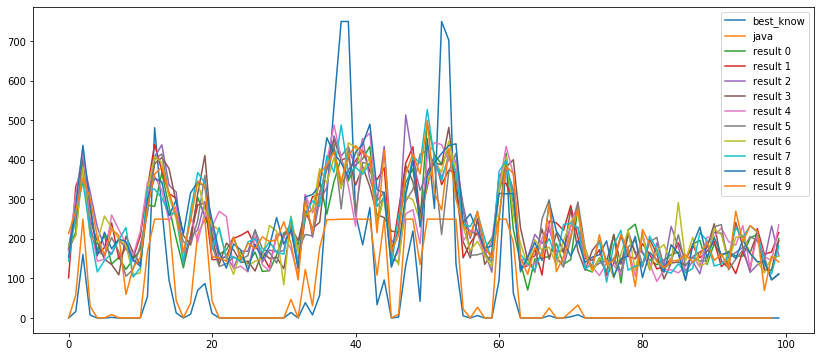

In [14]:
plt.figure(figsize=(14,6))
plt.plot(bestKnow, '-', label='best_know')
plt.plot(java_results, '-', label='java')
for i,opt in enumerate(runs.optimizations):
    plt.plot(opt.recorder.best_times_fitness, '-', label=f'result {i}')
plt.legend()

# --